1. Set Up Your Environment and Read in the Data

a. Mount Google Drive

In Colab, first mount your Google Drive so that you can access files stored there.*italicised text*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After running this cell, follow the on‐screen instructions to authorize access.

b. Import Required Libraries

We’ll need several common libraries for data handling, visualization, and modeling.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

c. Read the Historical Price Data

Assuming your CSV is located at
My Drive/Coab Notebooks/[Alexandria] - Machine Also Can Learn/dataset/BBCA/BBCA_history_price.csv:

In [16]:
csv_path = '/content/drive/MyDrive/Colab Notebooks/[Alexandria] - Machine Also Can Learn/dataset/BBCA/BBCA_history_price.csv'
price_data = pd.read_csv(csv_path, parse_dates=['Date'])
price_data.head()

,Date,Stock,Currency,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2004-06-08 00:00:00+07:00,BBCA,IDR,101.32,104.21,101.32,102.76,499150000,0.0,0.0
1,2004-06-09 00:00:00+07:00,BBCA,IDR,102.76,105.66,101.32,104.21,294290000,0.0,0.0
2,2004-06-10 00:00:00+07:00,BBCA,IDR,104.21,104.21,102.76,104.21,165590000,0.0,0.0
3,2004-06-11 00:00:00+07:00,BBCA,IDR,102.76,104.21,102.76,104.21,135830000,0.0,0.0
4,2004-06-14 00:00:00+07:00,BBCA,IDR,104.21,104.21,101.32,102.76,158540000,0.0,0.0


d. Read the Financials Excel File

Since your Excel file contains multiple sheets, we can load all of them into a dictionary of DataFrames.

In [19]:
excel_path = '/content/drive/MyDrive/Colab Notebooks/[Alexandria] - Machine Also Can Learn/dataset/BBCA/BBCA-financials.xlsx'
financials = pd.read_excel(excel_path, sheet_name=None)  # Loads all sheets
# To see available sheets:
print(financials.keys())

dict_keys(['Income-Annual', 'Balance-Sheet-Annual', 'Cash-Flow-Annual', 'Ratios-Annual', 'Income-Quarterly', 'Balance-Sheet-Quarterly', 'Cash-Flow-Quarterly', 'Ratios-Quarterly', 'Income-TTM', 'Balance-Sheet-TTM', 'Cash-Flow-TTM', 'Ratios-TTM'])


Each key in the financials dictionary corresponds to a sheet (for example, 'Income-Annual - information', 'Balance-Sheet-Annual - information', etc.). You can inspect any of these sheets:

In [22]:
# Access the 'Income-Annual' sheet from the Excel file
df_income_annual = financials['Income-Annual']
df_income_annual.head()

# Print the keys of the dictionary to see all available sheets
print(financials.keys())

dict_keys(['Income-Annual', 'Balance-Sheet-Annual', 'Cash-Flow-Annual', 'Ratios-Annual', 'Income-Quarterly', 'Balance-Sheet-Quarterly', 'Cash-Flow-Quarterly', 'Ratios-Quarterly', 'Income-TTM', 'Balance-Sheet-TTM', 'Cash-Flow-TTM', 'Ratios-TTM'])


2. Exploratory Data Analysis (EDA)

a. Analyze the Historical Price Data

Let’s inspect and plot the close price over time. (If you haven’t already loaded your CSV data into a DataFrame called price_data, be sure to do so.)

                       Date Stock Currency    Open    High     Low   Close  \
0 2004-06-08 00:00:00+07:00  BBCA      IDR  101.32  104.21  101.32  102.76   
1 2004-06-09 00:00:00+07:00  BBCA      IDR  102.76  105.66  101.32  104.21   
2 2004-06-10 00:00:00+07:00  BBCA      IDR  104.21  104.21  102.76  104.21   
3 2004-06-11 00:00:00+07:00  BBCA      IDR  102.76  104.21  102.76  104.21   
4 2004-06-14 00:00:00+07:00  BBCA      IDR  104.21  104.21  101.32  102.76   

      Volume  Dividends  Stock Splits  
0  499150000        0.0           0.0  
1  294290000        0.0           0.0  
2  165590000        0.0           0.0  
3  135830000        0.0           0.0  
4  158540000        0.0           0.0  


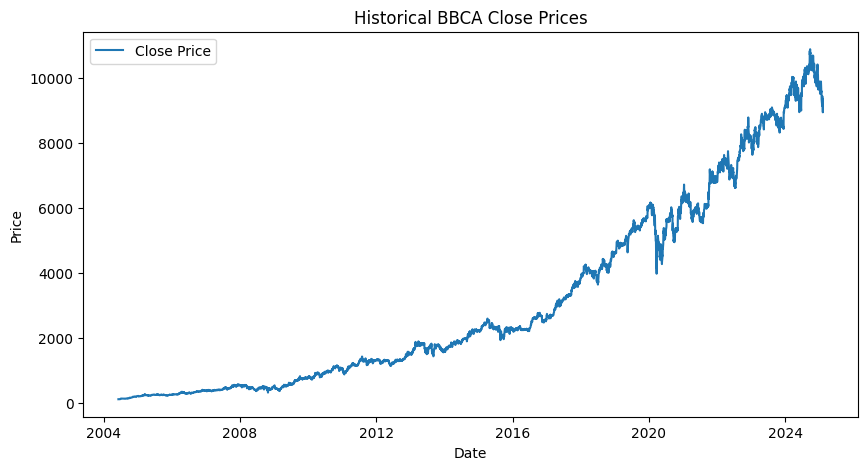

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that your 'Date' column is parsed as a datetime object.
price_data['Date'] = pd.to_datetime(price_data['Date'])

# Display the first few rows of the price data.
print(price_data.head())

# Plot the historical Close price.
plt.figure(figsize=(10, 5))
plt.plot(price_data['Date'], price_data['Close'], label='Close Price')
plt.title("Historical BBCA Close Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

b. Explore a Financial Sheet (e.g., Annual Ratios)

You can explore one of your financial sheets to see the relationships among different metrics. For instance, let’s create a correlation heatmap using the “Ratios-Annual” sheet:

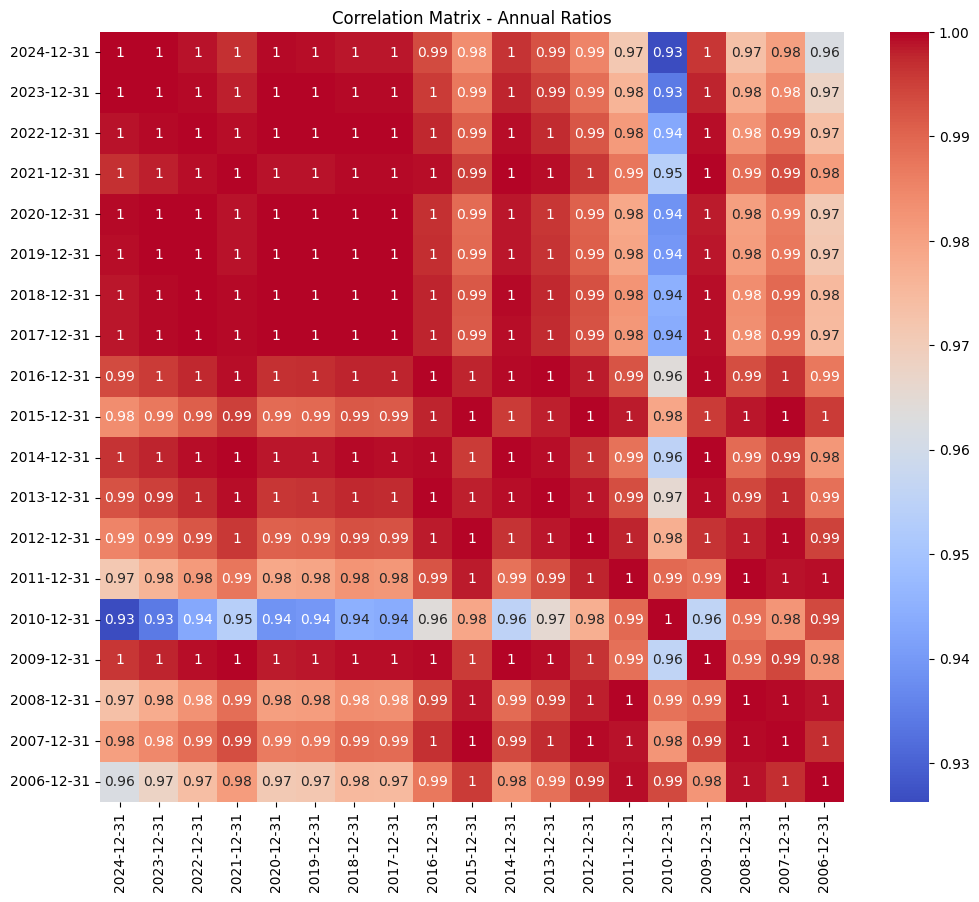

In [24]:
import numpy as np
import seaborn as sns

# Access the 'Ratios-Annual' sheet from the financials Excel file.
df_ratios_annual = financials['Ratios-Annual']

# For correlation analysis, we only need the numeric columns.
df_ratios_numeric = df_ratios_annual.select_dtypes(include=[np.number])

# Compute the correlation matrix.
corr_matrix = df_ratios_numeric.corr()

# Plot the correlation matrix.
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Annual Ratios")
plt.show()

Feel free to explore other sheets (e.g., Income-Annual, Balance-Sheet-Annual) similarly.

3. Filter Historical Price Data to the Last 10 Years

Since you want to train your model on recent trends, filter your price data to include only the last 10 years.

Data from 2015-02-09 00:00:00+07:00 to 2025-02-07 00:00:00+07:00


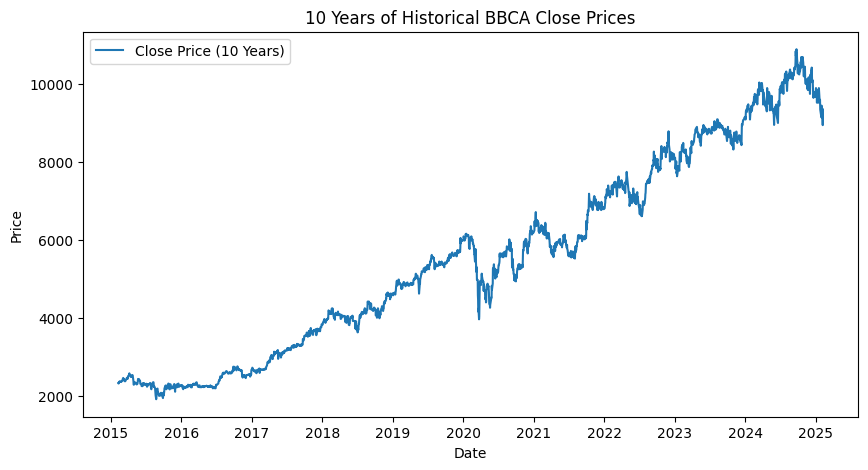

In [25]:
from pandas.tseries.offsets import DateOffset

# Determine the maximum date in the dataset.
max_date = price_data['Date'].max()

# Calculate the date 10 years before the max_date.
start_date = max_date - DateOffset(years=10)

# Filter the data for the last 10 years.
price_10y = price_data[price_data['Date'] >= start_date]
print("Data from", price_10y['Date'].min(), "to", price_10y['Date'].max())

# Plot the filtered 10-year data.
plt.figure(figsize=(10, 5))
plt.plot(price_10y['Date'], price_10y['Close'], label='Close Price (10 Years)')
plt.title("10 Years of Historical BBCA Close Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

4. Machine Learning Forecasting: LSTM and ARIMA

a. Preprocess the Data for LSTM

We first extract the “Close” price series from the filtered data and scale it. Then, we create time‑series sequences that the LSTM model can learn from.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assume price_10y is already defined and contains the last 10 years of data.
# Make sure the data is sorted by Date and set the Date as the index.
data = price_10y[['Date', 'Close']].copy()
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

# Use only the 'Close' prices for forecasting.
dataset = data['Close'].values.reshape(-1, 1)

# Scale the data between 0 and 1 for better performance with neural networks.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Function to create sequences (windows) from the time series.
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Set window size (for example, using the past 60 days to predict the next day).
window_size = 60
X, y = create_sequences(scaled_data, window_size)

# Reshape X to be in the format [samples, time_steps, features] required by LSTM.
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Optionally, split the data into training and testing sets (80% train, 20% test).
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

b. Build and Train the LSTM Model

We now define an LSTM network using TensorFlow/Keras and train it on the training data.

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Build the LSTM model.
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model.
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary.
model_lstm.summary()

# Train the model.
history = model_lstm.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 0.0319 - val_loss: 7.1205e-04
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0017 - val_loss: 8.5135e-04
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0010 - val_loss: 7.0296e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0011 - val_loss: 5.6613e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 9.8609e-04 - val_loss: 4.4876e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 8.4987e-04 - val_loss: 6.2817e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 7.7168e-04 - val_loss: 0.0011
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 7.0785e-04 - val_loss: 0.0019
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 6.7560e-04 - val_loss: 9.2813e-04
Epoch 12/20
61

Note: You can adjust the number of epochs or the architecture if needed.

c. Forecast the Next 2 Years Using the LSTM Model

We now use an iterative (recursive) approach: we take the last available window from our data and then repeatedly predict the next day, appending the prediction to our window to forecast further into the future

In [28]:
# Define how many future days to forecast (approx. 2 years ~ 730 days).
forecast_steps = 730

# Get the last 'window_size' days from our scaled data as the starting window.
last_window = scaled_data[-window_size:]
forecast_lstm = []

# Copy the last window to iterate.
current_window = last_window.copy()

for i in range(forecast_steps):
    # Reshape the window to shape (1, window_size, 1) for prediction.
    current_input = np.reshape(current_window, (1, window_size, 1))
    pred = model_lstm.predict(current_input)
    forecast_lstm.append(pred[0, 0])
    # Append the prediction to the current window and drop the oldest value.
    current_window = np.append(current_window, pred)[1:]

# Convert the forecast from scaled values back to the original scale.
forecast_lstm = np.array(forecast_lstm).reshape(-1, 1)
forecast_lstm = scaler.inverse_transform(forecast_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━

d. Forecast the Next 2 Years Using ARIMA (Alternative Method)

Here we build a classical ARIMA model from the statsmodels library. This method is different from the LSTM but can be useful to compare forecasts.

In [29]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

# Use the original 'Close' series from the data.
close_series = data['Close']

# Fit an ARIMA model (here we choose order=(5,1,0); you may need to tune this).
arima_model = ARIMA(close_series, order=(5,1,0))
arima_result = arima_model.fit()

# Forecast the next 730 days.
forecast_arima = arima_result.forecast(steps=forecast_steps)
# Convert ARIMA forecast to a numpy array with shape (730, 1)
forecast_arima = np.array(forecast_arima).reshape(-1, 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


e. Combine the Forecasts (Ensemble)

One simple way to combine forecasts from both methods is to average them.

In [30]:
# Compute ensemble forecast (average of LSTM and ARIMA predictions).
ensemble_forecast = (forecast_lstm + forecast_arima) / 2

f. Visualize the Forecasts

Finally, we plot the historical “Close” prices along with the forecasts from LSTM, ARIMA, and the ensemble.

In [34]:
# Create a date range for the forecast period.
# 'data' is the DataFrame with your historical prices and a DateTimeIndex.
last_date = data.index[-1]
forecast_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=forecast_steps)

Plot Historical Prices and Forecasts (LSTM, ARIMA, Ensemble)

The code below plots the historical close prices (in blue) and the forecasts from the LSTM (green), ARIMA (red), and their ensemble (black dashed). You can change the colors as desired:

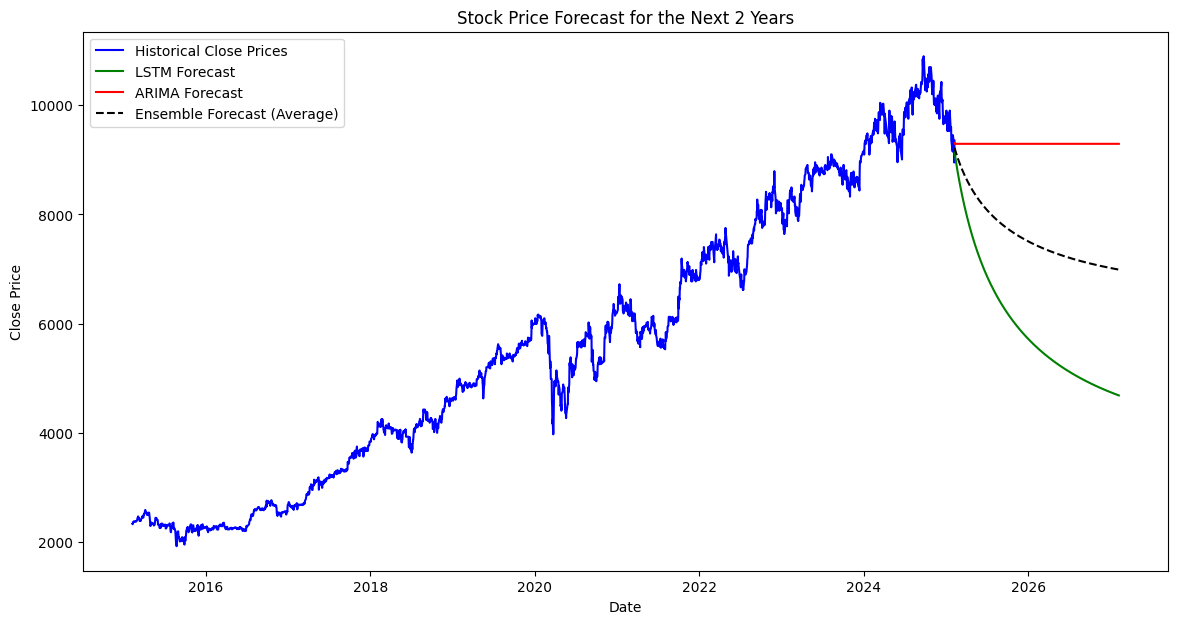

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue')
plt.plot(forecast_dates, forecast_lstm, label='LSTM Forecast', color='green')
plt.plot(forecast_dates, forecast_arima, label='ARIMA Forecast', color='red')
plt.plot(forecast_dates, ensemble_forecast, label='Ensemble Forecast (Average)', linestyle='--', color='black')
plt.title('Stock Price Forecast for the Next 2 Years')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Compare Actual vs. LSTM Test Predictions

To help check if the LSTM model is learning correctly, you can compare the model’s predictions on the test set with the actual prices from the corresponding period. Since you created your training and test sets from the sequences, you can do the following:

1.	Generate Predictions for the Test Set:
(If you haven’t already, use the model to predict on X_test.)

In [36]:
# Predict on the test set
lstm_test_predictions = model_lstm.predict(X_test)
# Inverse transform to get back to original scale
lstm_test_predictions = scaler.inverse_transform(lstm_test_predictions)
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


2.	Determine the Corresponding Dates for the Test Set:
Because your sequences started at index window_size and you split the data into training and test sets, the test dates correspond to the last portion of the original data (after the training portion). One way to compute these dates is:

In [38]:
# Calculate the starting index for the test set in the original data.
# Note: When creating sequences, the first 'window_size' days are lost.
test_start_index = train_size + window_size
test_dates = data.index[test_start_index:]
# Ensure the length of test_dates matches the number of test predictions.
test_dates = test_dates[:len(actual_test)]

3. Plot the Actual vs. LSTM Test Predictions:

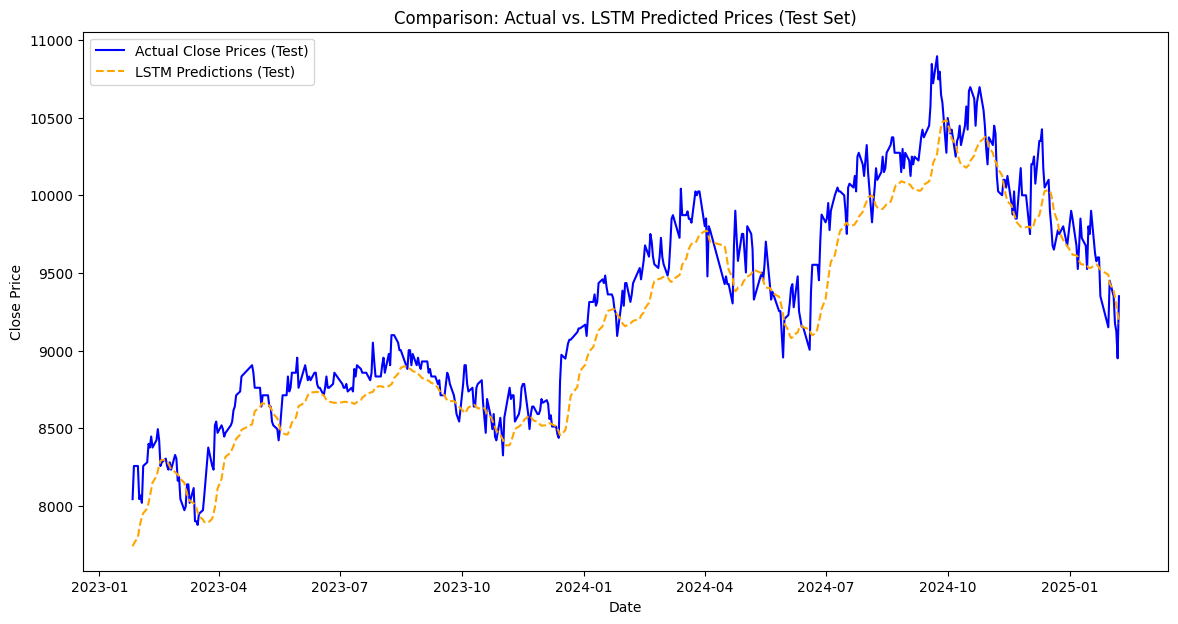

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(test_dates, actual_test, label='Actual Close Prices (Test)', color='blue')
plt.plot(test_dates, lstm_test_predictions, label='LSTM Predictions (Test)', color='orange', linestyle='--')
plt.title('Comparison: Actual vs. LSTM Predicted Prices (Test Set)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()